# Aula 11 - Redes neurais

Neste notebook iremos utilizar a biblioteca [Keras](https://www.keras.io) para construir redes neurais.

Faremos dois exemplos: XOR lógico (para classificação) e preço de casas (para regressão).

## Exemplo 1 - XOR lógico

Para começar, precisamos importar algumas bibliotecas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

Iniciaremos com uma tarefa simples: aprender a função lógica XOR. Para isto, utilizaremos a tabela verdade desta operação como dataset para treinar a rede neural.

A | B | XOR
- | - | -
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0

Em particular, utilizaremos as colunas A e B como entradas da rede neural e a coluna XOR como saída. Especificamente, cada exemplo será composto por uma entrada X (par de dois valores representando A e B) e por uma saída y (valor individual representando XOR).

In [2]:
# entradas e saídas referentes à operação lógica XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

Resolveremos a tarefa acima como um problema de classificação. Desta forma, é conveniente codificar a saída de forma categórica (mais detalhes sobre este tipo de procedimento [aqui](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)).

In [3]:
# codifica as saídas de forma categórica
y = np_utils.to_categorical(y)

Na categorização acima, os valores 0 e 1 são representados por [1, 0] e [0, 1], respectivamente. Isto fica evidente ao imprimir a variável.

In [4]:
print(y)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


Nosso próximo passo consiste em construir a rede neural. Para isto, utilizaremos o modelo sequencial do Keras. Neste modelo, podemos empilhar as diferentes camadas da rede com bastante facilidade.

In [5]:
# cria um modelo sequencial
model = Sequential()

Após criar o modelo sequencial, podemos empilhar as camadas utilizando a função `add`. Primeiramente, criaremos uma camada de 64 neurônios, cada qual com uma função de ativação do tipo tangente hiperbólica. O parâmetro `input_dim` é necessário para definir a dimensão das entradas.

In [6]:
# 1a camada: 64 neurônios com a mesma entrada com tamanho compatível com a entrada
model.add(Dense(64, activation='tanh', input_dim=X.shape[1]))

Ao final, criaremos uma camada de saída. Considerando que nossas saídas são categóricas, cada qual de dimensão 2, nossa rede também precisa ter duas saídas. Desta forma, criaremos uma camada de saída com dois neurônios, cada qual com uma função de ativação do tipo sigmóide. Note que nesta camada não foi preciso definir a dimensão de entrada; isto acontece porque o Keras define automaticamente a dimensão de entrada dos neurônios de uma camada oculta com base nas saídas da camada anterior.

In [7]:
# 2a camada (saída): 2 neurônios, totalmente conectada
model.add(Dense(2, activation='sigmoid'))

Definida a rede, agora podemos compilar a mesma para gerar o modelo final. Na compilação, devemos definir o algoritmo (`optimizer`) que será utilizado para treinar a rede bem como a função de erro (`loss`) e as métricas (`metrics`). O Keras possui diversos algoritmos de otimização ([lista](https://keras.io/api/optimizers/)), funções de erro ([lista](https://keras.io/api/losses/)) e métricas ([lista](https://keras.io/api/metrics/)). No nosso caso, estamos utilizando métricas e função de erro próprias para a tarefa de classificação. Para otimização, estamos utilizando o `adam`, que é um excelente algoritmo para redes neurais.

In [12]:
# compila o modelo, utilizando a entropia cruzada como função de erro, 
# com o algoritmo Adam, e avaliando o modelo através da métrica acurácia
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["binary_crossentropy", "accuracy"])

Para ter uma visão geral do modelo resultante, podemos imprimir um resumo do mesmo. Note que o modelo criado possui 322 parâmetros. Isto significa que, durante o treinamento, o algoritmo de otimização terá que ajustar o valor de 322 variáveis de modo a reduzir o erro.

In [13]:
# mostra um resumo do modelo compilado
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


Definidos os dados e a rede, agora podemos iniciar o treinamento. Para isto, devemos utilizar a função `fit`, especificando os dados de entrada e saída (no nosso caso, `X` e `y`) e o número de épocas (`epochs`).

In [10]:
# treina o modelo
history = model.fit(X, y, epochs=1000, verbose=0) 

No código acima, armazenamos o retorno do treinamento na variável `history` para poder visualizar a evolução do processo de treinamento. Para isto, podemos plotar o erro ao longo do tempo como segue.

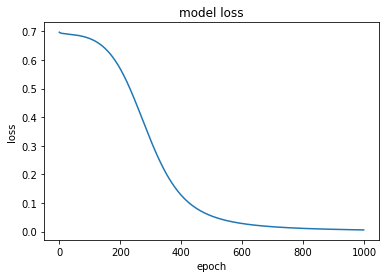

In [11]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Conforme pode ser observado, o erro final é bastante baixo. No entanto, ele só chega a níveis adequados no final do treinamento. 

Da mesma forma que fizemos com o erro, podemos plotar também a acurácia do modelo.

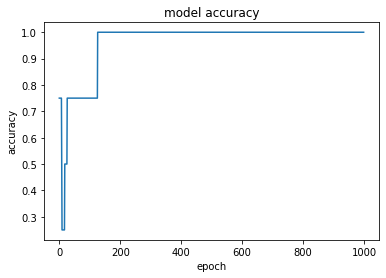

In [14]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Bem como anteriormente, note que a acurácia aumenta com o treinamento do modelo.

Finalmente, agora podemos avaliar nosso modelo. Para isto, utilizaremos a função `evaluate`, que recebe como argumentos dados de entrada (`X`) e saída (`y`) e retorna as métricas anteriormente definidas.

In [16]:
# avalia o modelo
score = model.evaluate(X, y)
print("\nAcurácia: ", score[-1])

# verifica as predições
print("\nPredições:")
pred = model.predict(X)
print(pred)

1/1 [==============================] - 0s 61ms/step - loss: 0.0060 - binary_crossentropy: 0.0060 - accuracy: 1.0000

Acurácia:  1.0

Predições:
[[0.99502885 0.00671738]
 [0.00549677 0.9929099 ]
 [0.00531757 0.9932513 ]
 [0.9950729  0.00640699]]


Note que nosso modelo obteve uma acurácia de 100%. Nenhuma surpresa, dado que o problema XOR é bastante simples.

Para melhorar o entendimento, abaixo podemos comparar as saídas da rede com as saídas esperadas.

In [17]:
# imprime as predições de forma mais clara
print("Entrada\t\tSaída esperada\t\tSaída prevista")
for i in range(len(X)):
    print(f"{X[i]}\t\t{y[i]}\t\t\t{[round(v) for v in pred[i]]}")

Entrada		Saída esperada		Saída prevista
[0. 0.]		[1. 0.]			[1, 0]
[0. 1.]		[0. 1.]			[0, 1]
[1. 0.]		[0. 1.]			[0, 1]
[1. 1.]		[1. 0.]			[1, 0]


## Exemplo 2 - Boston Housing

Para começar, precisamos importar algumas bibliotecas.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from keras.datasets import boston_housing
from tensorflow.keras.utils import to_categorical

Neste exemplo, resolveremos a tarefa de regressão. Para isto, utilizaremos o dataset Boston Housing, que contém informações sobre imóveis e seus preços na cidade de Boston (EUA). Este dataset pode ser facilmente importado através da função `boston_housing.load_data`. Esta função retorna duas tuplas, as quais representam os dados de treino (entrada e saída) e de teste (entrada e saída).

In [19]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


Para entender melhor estes dados, podemos imprimir uma pequena amostra como segue.

In [20]:
print('Shape dados de treino:   %s'% (train_data.shape,))
print('Shape dados de teste:    %s'% (test_data.shape,))
print('Exemplo de entrada:      %s'% (train_data[0]))
print('Exemplo de saída:        %f'% (train_targets[0]))

Shape dados de treino:   (404, 13)
Shape dados de teste:    (102, 13)
Exemplo de entrada:      [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Exemplo de saída:        15.200000


Para que o modelo aprenda melhor, precisamos realizar um pré-processamento dos dados.

In [21]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Definido o dataset, agora podemos criar a rede neural.

Neste exemplo, estamos empilhando três camadas, sendo duas com 64 neurônios cada e uma (de saída) com apenas um neurônio. Note que a camada de saída possui apenas um neurônio porque estamos lidando com a tarefa de regressão.

In [22]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                896       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Agora podemos treinar o modelo utilizando nosso dataset.

In [23]:
history = model.fit(train_data, train_targets, epochs=100, verbose=0)

Treinado o modelo, podemos analisar seu desempenho através do gráfico abaixo.

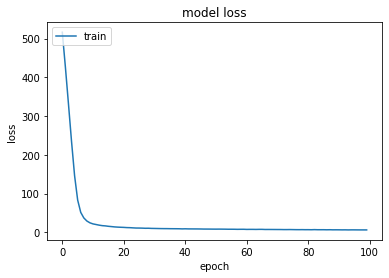

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Para avaliar o modelo, podemos obter o valor do erro como segue.

In [25]:
test_mse_score = model.evaluate(test_data, test_targets)
test_mse_score

4/4 [==============================] - 0s 3ms/step - loss: 16.3881 - mse: 16.3881


[16.388107299804688, 16.388107299804688]

Note que o erro acima está alto. Mas ainda assim, é uma aproximação razoável.

Podemos ter uma ideia melhor deste erro através do gráfico abaixo. Quanto mais distante da linha, maior o erro.

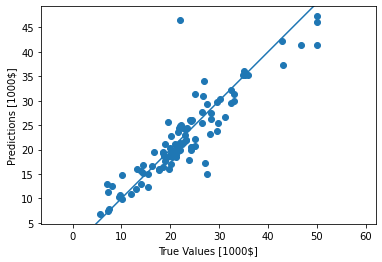

In [26]:
test_predictions = model.predict(test_data).flatten()
plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100],[-100,100])

## Exercícios

### Exercício 1

Repita o exemplo 1 para a expressão lógica abaixo.

![alt text](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/combination-comb25.gif)

In [27]:
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]]).astype('float32')
y = np.array([[0],[0],[0],[0],[1],[0],[0],[0]]).astype('float32')
y = np_utils.to_categorical(y)

In [28]:
model = Sequential()
model.add(Dense(64, activation='tanh', input_dim=X.shape[1]))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["binary_crossentropy", "accuracy"])
model.summary()
history = model.fit(X, y, epochs=1000, verbose=0) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                256       
                                                                 
 dense_6 (Dense)             (None, 2)                 130       
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________


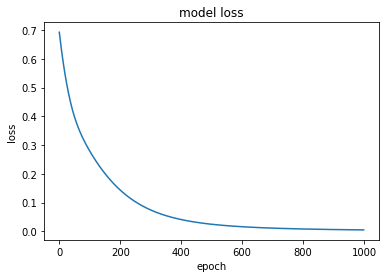

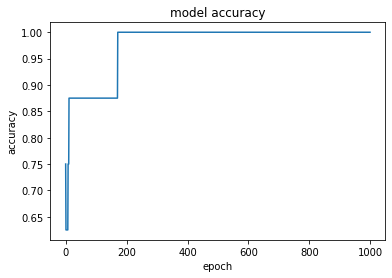

In [29]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [31]:
score = model.evaluate(X, y)
print("\nAcurácia: ", score[-1])

print("\nPredições:")
pred = model.predict(X)
print(pred)

print("Entrada\t\tSaída esperada\t\tSaída prevista")
for i in range(len(X)):
    print(f"{X[i]}\t\t{y[i]}\t\t\t{[round(v) for v in pred[i]]}")

1/1 [==============================] - 0s 69ms/step - loss: 0.0046 - binary_crossentropy: 0.0046 - accuracy: 1.0000

Acurácia:  1.0

Predições:
[[9.9184752e-01 6.5244436e-03]
 [9.9999487e-01 2.1845879e-06]
 [9.9999321e-01 3.1104262e-06]
 [1.0000000e+00 1.5069697e-08]
 [1.9639224e-02 9.8650473e-01]
 [9.9316669e-01 4.3232441e-03]
 [9.9154449e-01 6.2784553e-03]
 [9.9999416e-01 2.3541552e-06]]
Entrada		Saída esperada		Saída prevista
[0. 0. 0.]		[1. 0.]			[1, 0]
[0. 0. 1.]		[1. 0.]			[1, 0]
[0. 1. 0.]		[1. 0.]			[1, 0]
[0. 1. 1.]		[1. 0.]			[1, 0]
[1. 0. 0.]		[0. 1.]			[0, 1]
[1. 0. 1.]		[1. 0.]			[1, 0]
[1. 1. 0.]		[1. 0.]			[1, 0]
[1. 1. 1.]		[1. 0.]			[1, 0]


### Exercício 2

Construa um modelo capaz de fazer o reconhecimento de dígitos do dataset MNIST ([link](https://keras.io/api/datasets/mnist/)).

In [32]:
from keras.datasets import mnist
(train_data, train_targets), (test_data, test_targets) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [33]:
num_classes = 10

train_data = train_data.reshape(train_data.shape[0], 784)
test_data = test_data.reshape(test_data.shape[0], 784)

train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

train_targets = to_categorical(train_targets, num_classes)
test_targets = to_categorical(test_targets, num_classes)

In [34]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_data, train_targets, epochs=20, batch_size=128, validation_data=(test_data, test_targets), verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3650 - accuracy: 0.8990 - val_loss: 0.2282 - val_accuracy: 0.9260
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1556 - accuracy: 0.9538 - val_loss: 0.1645 - val_accuracy: 0.9472
Epoch 3/20
469/469 [==========

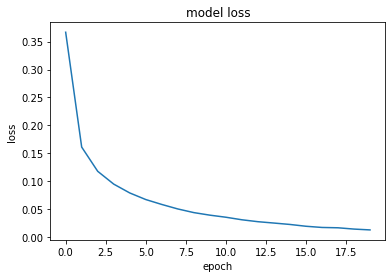

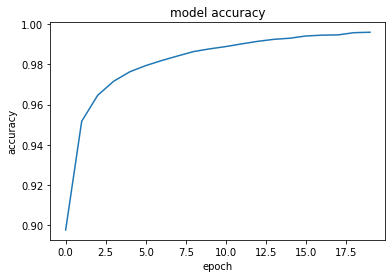

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
score = model.evaluate(test_data, test_targets, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1213373333339232
Test accuracy: 0.9763000011444092
